In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df = df.sample(frac = 1)
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
16323,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9344,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25966,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6947,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17727,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13284,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19032,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10077,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_y = pd.DataFrame(df["label"],columns = ["label"])
df_y

,label
16323,6
9344,2
25966,7
6947,7
17727,7
...,...
13284,4
27999,7
19032,8
10077,4


In [5]:
df_x = df.loc[:, df.columns!='label']
df_x

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
16323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25966,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6947,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10077,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
arr = df_x.to_numpy()
arr_y = df_y.to_numpy()

In [7]:
arr_y.shape

(42000, 1)

In [8]:
arr.shape

(42000, 784)

In [9]:
x = arr[0].reshape(28,28)

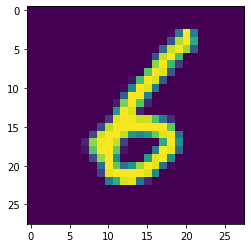

In [10]:
plt.imshow(x)

In [11]:
arr = arr/255.0

In [12]:
arr.shape

(42000, 784)

In [13]:
arr.T.shape

(784, 42000)

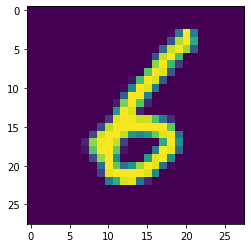

In [14]:
x = arr[0].reshape(28,28)
plt.imshow(x)

# TRAINING

In [15]:
def initializeParameters(shape):
    b = 0.0
    w = np.zeros([shape,1])
    return w,b

In [16]:
def softmax(Z):
    return np.exp( Z - np.max(Z) )/( np.sum( np.exp(Z - np.max(Z) )))

In [17]:
def derivativeSoftmax(softmax_Z):
    # Reshape the 1-d softmax to 2-d so that np.dot will do the matrix multiplication
    s = softmax_Z.reshape(-1,1)
    return np.diagflat(s) - np.dot(s, s.T)

In [18]:
def propagation(X,Y,W,b):
    
    m = Y.shape[0]
    Z = np.dot(W.T,X) + b
    Y_hat = softmax(Z)  
    
    cost = -np.sum( derivativeSoftmax(Y_hat) ) / m
    print(f"Cost = {cost}")
    
    dw = np.dot(X, (Y_hat - Y).T)/m
    db = np.sum(Y_hat - Y)/m
    
    costFormatted = np.squeeze(np.array(cost))
    
    return dw,db,costFormatted

In [20]:
def optimizeParameters(W,b,dw,db,l_rate=0.001):
    W = W - dw*l_rate
    b = b - db*l_rate
    return W,b

In [21]:
import time

In [22]:
def predict(X,W,b):
    startTime = time.time()
    Z = np.dot(W.T,X) + b
    Y_hat = softmax(Z)
    predictions = np.zeros([Y_hat.shape[0],1])
    
    for i in range(Y_hat.shape[0]):
        if Y_hat[0,i] < 0.5:
            predictions[0,i] = 0
        else:
            closest = 1000
            for i in range(1,10):
                if closest > np.abs(Y_hat[0,i] - i):
                    closest == np.abs(Y_hat[0,i] - i)
                predictions[0,i] = closest
    timePassed = startTime - time.time()
    print(f"Time required for this operation is {timePassed*10000000}")
    return predictions

In [23]:
def predict2(X,W,b):
    startTime = time.time()
    Z = np.dot(W.T,X) + b
    Y_hat = softmax(Z)
    predictions = np.zeros([1,X.shape[1]])
    
    for i in range(Y_hat.shape[0]):
        if Y_hat[0,i] < 0.5:
            predictions[0,i] = 0
        elif Y_hat[0,i] >= 0.5 and Y_hat < 1.5:
            predictions[0,i] = 1
        elif Y_hat[0,i] >= 1.5 and Y_hat < 2.5:
            predictions[0,i] = 1
        elif Y_hat[0,i] >= 2.5 and Y_hat < 3.5:
            predictions[0,i] = 1
        elif Y_hat[0,i] >= 3.5 and Y_hat < 4.5:
            predictions[0,i] = 1
        elif Y_hat[0,i] >= 4.5 and Y_hat < 5.5:
            predictions[0,i] = 1
        elif Y_hat[0,i] >= 5.5 and Y_hat < 6.5:
            predictions[0,i] = 1
        elif Y_hat[0,i] >= 6.5 and Y_hat < 7.5:
            predictions[0,i] = 1
        elif Y_hat[0,i] >= 7.5 and Y_hat < 8.5:
            predictions[0,i] = 1
        elif Y_hat[0,i] >= 8.5:
            predictions[0,i] = 1
            
    timePassed = startTime - time.time()
    print(f"Time required for this operation is {timePassed*10000000}")
    return predictions

In [25]:
def model(X,Y,l_rate=0.001,iteration=10):
    
    W,b = initializeParameters(X.shape[0])
    
    costHistory = []
    for i in range(iteration):
        dw,db,cost = propagation(X,Y,W,b)
        costHistory.append(cost)
        W,b = optimizeParameters(W,b,dw,db,l_rate)
    
    predictions = predict(X,W,b)
    predictions2 = predict2(X,W,b)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    return cost, predictions, predictions2

In [26]:
model(arr.T, arr_y.T, l_rate=0.005, iteration = 100)

MemoryError: Unable to allocate 13.1 GiB for an array with shape (42000, 42000) and data type float64